# Libraries Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Loading Data

In [60]:
data = pd.read_excel("Response.xlsx")
print("Columns in the Data:",data.columns)
print("Head of the Data:")
data.head()

Columns in the Data: Index(['What is your gender? ', 'What is your age? ',
       'What is your Monthly Household Income?', 'K1', 'K2', 'K3', 'K4', 'K5',
       'ATT1', 'ATT2', 'ATT3', 'ATT4', 'ATT5', 'P1', 'P2', 'P3', 'P4', 'P5'],
      dtype='object')
Head of the Data:


,What is your gender?,What is your age?,What is your Monthly Household Income?,K1,K2,K3,K4,K5,ATT1,ATT2,ATT3,ATT4,ATT5,P1,P2,P3,P4,P5
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,4,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [61]:
data=data.fillna(0)

In [19]:
data=data.rename(columns={
    'What is your gender? ': 'Gender',
    'What is your age? ': 'Age',
    'What is your Monthly Household Income?':'Income',
    'K1': 'Definition',
    'K2': 'Environment',
    'K3': 'Policy',
    'K4': 'Charging',
    'K5': 'Technology',
    'ATT1': 'EcoBelief',
    'ATT2': 'Savings',
    'ATT3': 'Performance',
    'ATT4': 'Support',
    'ATT5': 'Infrastructure',
    'P1': 'Experience',
    'P2': 'Ownership',
    'P3': 'PublicCharging',
    'P4': 'CostEval',
    'P5': 'Research'
})
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce')
data = data.dropna(subset=['Age', 'Income', 'Gender'])
data['Age'] = data['Age'].astype(int)
data['Income'] = data['Income'].astype(int)
data['Gender'] = data['Gender'].astype(int)

In [22]:
gender_convertion = {
      1:'male',
      2:'female'
}
data['Gender'] = data['Gender'].map(gender_convertion)
age_convertion = {
    1: '24-30',
    2: '31-37',
    3: '38-44',
    4: '45+'
}
data['Age'] = data['Age'].map(age_convertion)
income_convertion={
    1: 'Professors-10L',
    2: 'Charted Accountants-15L',
    3: 'Research Scholars-18L',
    4: 'Doctors-20L'
}
data['Income']=data['Income'].map(income_convertion)

In [23]:
data.head()

,Gender,Age,Income,Definition,Environment,Policy,Charging,Technology,EcoBelief,Savings,Performance,Support,Infrastructure,Experience,Ownership,PublicCharging,CostEval,Research
0,male,24-30,Professors-10L,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,female,31-37,Charted Accountants-15L,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,male,38-44,Research Scholars-18L,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,male,45+,Professors-10L,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,female,24-30,Charted Accountants-15L,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


#Gender Comparison Plot

<Figure size 1000x500 with 0 Axes>

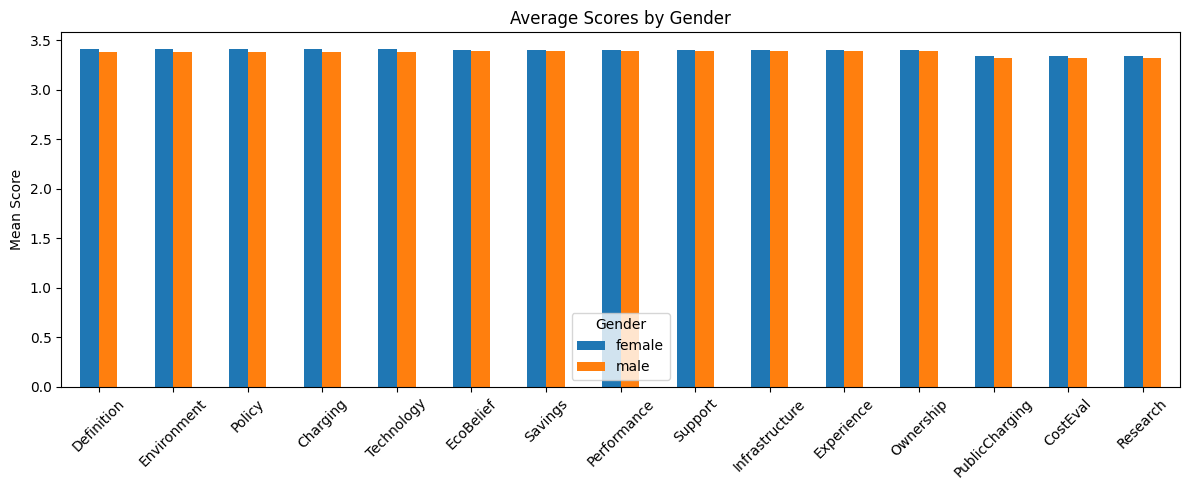

        Definition  Environment    Policy  Charging  Technology  EcoBelief  \
Gender                                                                       
female    3.411255     3.411255  3.411255  3.411255    3.411255   3.406926   
male      3.386047     3.386047  3.386047  3.386047    3.386047   3.393023   

         Savings  Performance   Support  Infrastructure  Experience  \
Gender                                                                
female  3.406926     3.406926  3.406926        3.406926    3.406926   
male    3.393023     3.393023  3.393023        3.393023    3.393023   

        Ownership  PublicCharging  CostEval  Research  
Gender                                                 
female   3.406926        3.346320  3.346320  3.346320  
male     3.393023        3.323256  3.323256  3.323256  


In [25]:
gender_comparison = data.groupby('Gender').mean(numeric_only=True)
plt.figure(figsize=(10, 5))
gender_comparison.T.plot(kind='bar', figsize=(12, 5), title="Average Scores by Gender", ylabel="Mean Score")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()
print(gender_comparison)

# Visualization of Income Group

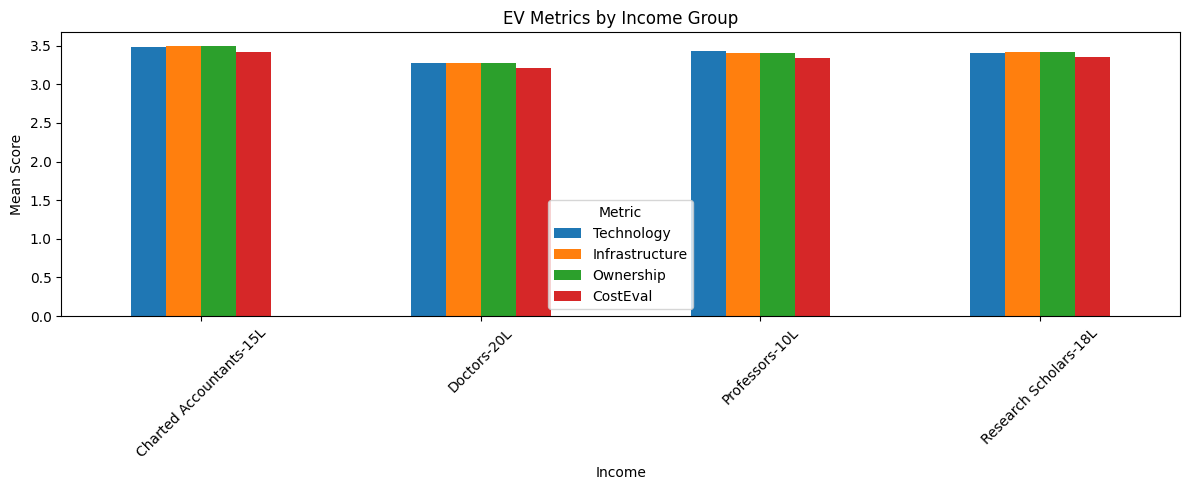

                         Technology  Infrastructure  Ownership  CostEval
Income                                                                  
Charted Accountants-15L    3.486577        3.496644   3.496644  3.422819
Doctors-20L                3.272358        3.272358   3.272358  3.215447
Professors-10L             3.426667        3.403333   3.403333  3.343333
Research Scholars-18L      3.397849        3.412186   3.412186  3.347670


In [26]:
income_comparison = data.groupby('Income')[['Technology', 'Infrastructure', 'Ownership', 'CostEval']].mean()
income_comparison.plot(kind='bar', figsize=(12, 5), title="EV Metrics by Income Group", ylabel="Mean Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
print(income_comparison)

# Knowledge by Age Group Plot


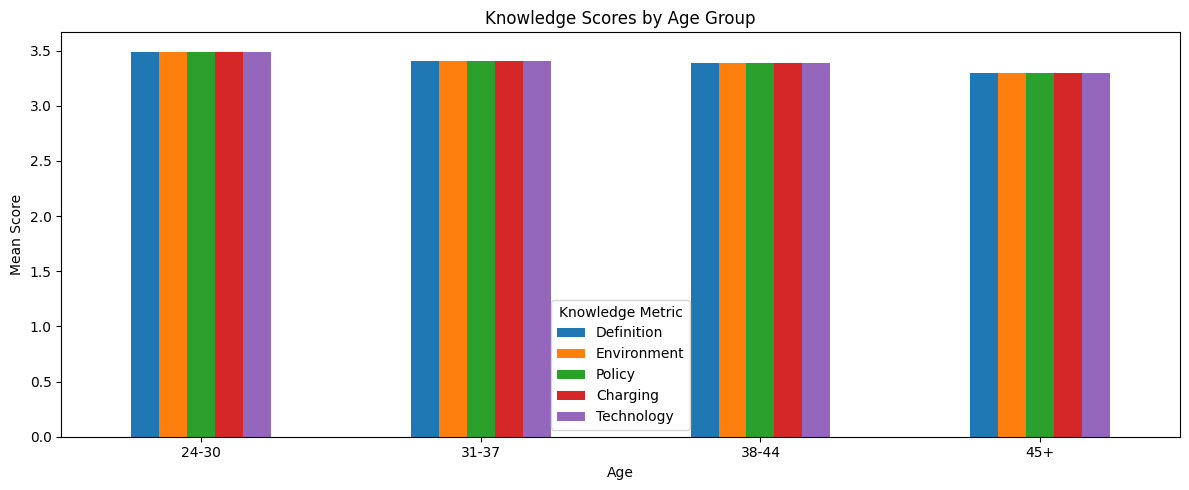

       Definition  Environment    Policy  Charging  Technology
Age                                                           
24-30    3.491749     3.491749  3.491749  3.491749    3.491749
31-37    3.407895     3.407895  3.407895  3.407895    3.407895
38-44    3.384892     3.384892  3.384892  3.384892    3.384892
45+      3.298319     3.298319  3.298319  3.298319    3.298319


In [27]:
age_knowledge_comparison = data.groupby('Age')[['Definition', 'Environment', 'Policy', 'Charging', 'Technology']].mean()
age_knowledge_comparison.plot(kind='bar', figsize=(12, 5), title="Knowledge Scores by Age Group", ylabel="Mean Score")
plt.xticks(rotation=0)
plt.legend(title="Knowledge Metric")
plt.tight_layout()
plt.show()
print(age_knowledge_comparison)

# Attitude vs Practice Gap by Age


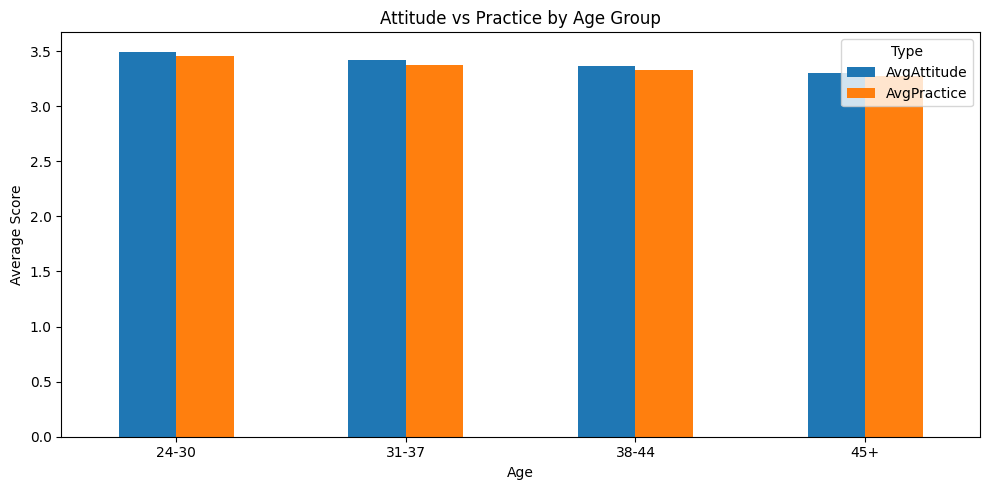

['EcoBelief', 'Savings', 'Performance', 'Support', 'Infrastructure']


In [28]:
attitude_cols = ['EcoBelief', 'Savings', 'Performance', 'Support', 'Infrastructure']
practice_cols = ['Experience', 'Ownership', 'PublicCharging', 'CostEval', 'Research']
age_attitude = data.groupby('Age')[attitude_cols].mean().mean(axis=1)
age_practice = data.groupby('Age')[practice_cols].mean().mean(axis=1)
attitude_vs_practice_gap = pd.DataFrame({
    'AvgAttitude': age_attitude,
    'AvgPractice': age_practice,
    'Gap': age_attitude - age_practice
})
attitude_vs_practice_gap[['AvgAttitude', 'AvgPractice']].plot(kind='bar', figsize=(10, 5),title="Attitude vs Practice by Age Group",ylabel="Average Score")
plt.xticks(rotation=0)
plt.legend(title="Type")
plt.tight_layout()
plt.show()
print(attitude_cols)

# Important Trait

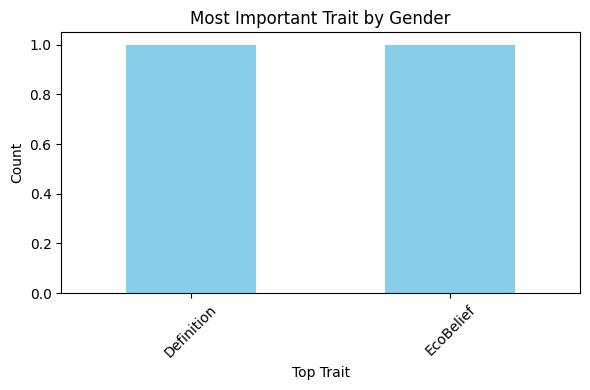

Gender
female    Definition
male       EcoBelief
dtype: object


In [29]:
top_traits_by_gender = data.groupby('Gender').mean(numeric_only=True).idxmax(axis=1)
plt.figure(figsize=(6, 4))
top_traits_by_gender.value_counts().plot(kind='bar', color='skyblue')
plt.title("Most Important Trait by Gender")
plt.ylabel("Count")
plt.xlabel("Top Trait")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top_traits_by_gender)

In [34]:
knowledge_features = ['Definition', 'Environment', 'Policy', 'Charging', 'Technology']
attitude_features = ['EcoBelief', 'Savings', 'Performance', 'Support', 'Infrastructure']
practice_features = ['Experience', 'Ownership', 'PublicCharging', 'CostEval', 'Research']
all_features= knowledge_features + attitude_features + practice_features
all_features

['Definition',
 'Environment',
 'Policy',
 'Charging',
 'Technology',
 'EcoBelief',
 'Savings',
 'Performance',
 'Support',
 'Infrastructure',
 'Experience',
 'Ownership',
 'PublicCharging',
 'CostEval',
 'Research']

# Normalization

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[all_features])
X_scaled_data = pd.DataFrame(X_scaled, columns=all_features)

In [41]:
print("Scaled data statistics:")
print(X_scaled_data.describe())

Scaled data statistics:
         Definition   Environment        Policy      Charging    Technology  \
count  1.123000e+03  1.123000e+03  1.123000e+03  1.123000e+03  1.123000e+03   
mean   5.061747e-17  5.061747e-17  5.061747e-17  5.061747e-17  5.061747e-17   
std    1.000446e+00  1.000446e+00  1.000446e+00  1.000446e+00  1.000446e+00   
min   -1.731716e+00 -1.731716e+00 -1.731716e+00 -1.731716e+00 -1.731716e+00   
25%   -2.895824e-01 -2.895824e-01 -2.895824e-01 -2.895824e-01 -2.895824e-01   
50%    4.314842e-01  4.314842e-01  4.314842e-01  4.314842e-01  4.314842e-01   
75%    1.152551e+00  1.152551e+00  1.152551e+00  1.152551e+00  1.152551e+00   
max    1.152551e+00  1.152551e+00  1.152551e+00  1.152551e+00  1.152551e+00   

          EcoBelief       Savings   Performance       Support  Infrastructure  \
count  1.123000e+03  1.123000e+03  1.123000e+03  1.123000e+03    1.123000e+03   
mean   5.061747e-17  5.061747e-17  5.061747e-17  5.061747e-17    5.061747e-17   
std    1.000446e+00  

#K-Means Algorithm (Different K Values)

In [68]:
def evaluate_kmeans(X, k_range):
    results = {}
    for k in k_range:
        if k <= len(X):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X)
            if k > 1:
                sil_score = silhouette_score(X, labels)
            else:
                sil_score = 0
            results[k] = {
                'labels': labels,
                'centers': kmeans.cluster_centers_,
                'silhouette_score': sil_score,
                'inertia': kmeans.inertia_
            }
            print("k:",k,"silhouette Score:",(sil_score*100),"Inertia:",kmeans.inertia_)
    return results
k_results = evaluate_kmeans(X_scaled, [2, 3])
best_k = max([k for k in k_results.keys() if k > 1],key=lambda k: k_results[k]['silhouette_score'])
print(f"\nBest k based on silhouette score: {best_k}")

k: 2 silhouette Score: 65.23614711591524 Inertia: 4735.714785486259
k: 3 silhouette Score: 70.8692114988219 Inertia: 1898.6420341738444

Best k based on silhouette score: 3


In [47]:
best_labels = k_results[best_k]['labels']
data['Cluster'] = best_labels
def analyze_clusters(df, features, cluster_col='Cluster'):
    cluster_stats = {}
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        knowledge_mean = cluster_data[knowledge_features].mean().mean()
        attitude_mean = cluster_data[attitude_features].mean().mean()
        practice_mean = cluster_data[practice_features].mean().mean()
        overall_mean = cluster_data[features].mean().mean()
        cluster_stats[cluster_id] = {
            'size': len(cluster_data),
            'knowledge_score': knowledge_mean,
            'attitude_score': attitude_mean,
            'practice_score': practice_mean,
            'overall_score': overall_mean,
            'members': cluster_data.index.tolist()
        }
        print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
        print(f"  Knowledge Score: {knowledge_mean:.2f}")
        print(f"  Attitude Score: {attitude_mean:.2f}")
        print(f"  Practice Score: {practice_mean:.2f}")
        print(f"  Overall KAP Score: {overall_mean:.2f}")
        print(f"  Members: {cluster_data.index.tolist()}")
        print("  Demographics:")
        for idx in cluster_data.index:
            row = cluster_data.loc[idx]
            print(f"    Sample {idx}: {row['Gender']}, {row['Age']}, {row['Income']}")
    return cluster_stats
cluster_analysis = analyze_clusters(data, all_features)


Cluster 0 (n=311):
  Knowledge Score: 4.97
  Attitude Score: 5.00
  Practice Score: 5.00
  Overall KAP Score: 4.99
  Members: [6, 9, 12, 15, 26, 29, 32, 35, 36, 39, 42, 45, 46, 49, 52, 55, 56, 59, 62, 65, 66, 69, 72, 75, 78, 81, 88, 91, 94, 97, 108, 111, 114, 117, 118, 121, 124, 127, 128, 131, 134, 137, 138, 141, 144, 151, 154, 157, 160, 171, 174, 177, 180, 181, 184, 187, 190, 191, 194, 197, 200, 201, 204, 212, 215, 218, 221, 232, 235, 238, 241, 242, 245, 248, 251, 252, 255, 258, 261, 262, 265, 268, 271, 272, 275, 278, 281, 284, 287, 289, 292, 293, 296, 299, 302, 305, 308, 322, 325, 327, 330, 334, 337, 346, 349, 356, 359, 362, 365, 376, 379, 382, 385, 386, 389, 392, 395, 396, 399, 402, 405, 406, 409, 412, 415, 416, 419, 428, 431, 434, 437, 448, 451, 454, 461, 464, 467, 470, 481, 484, 487, 490, 491, 494, 497, 500, 501, 504, 507, 510, 511, 514, 517, 520, 521, 524, 527, 530, 533, 536, 545, 548, 551, 554, 565, 568, 571, 574, 575, 578, 581, 584, 585, 588, 591, 594, 595, 598, 601, 604, 605,

PCA Explained Variance Ratio: [0.97934412 0.01655036]
Total Explained Variance: 0.996


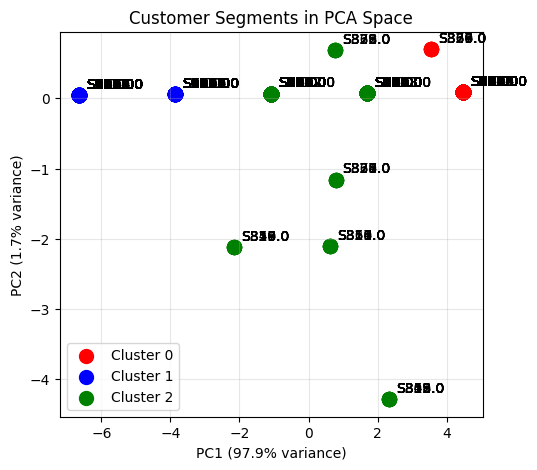

In [69]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.3f}")
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = best_labels
pca_df['Sample_ID'] = range(len(data))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster_id in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
               c=colors[cluster_id], label=f'Cluster {cluster_id}', s=100)
    for idx, row in cluster_data.iterrows():
        plt.annotate(f'S{row["Sample_ID"]}',
                    (row['PC1'], row['PC2']),
                    xytext=(5, 5), textcoords='offset points')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Customer Segments in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)


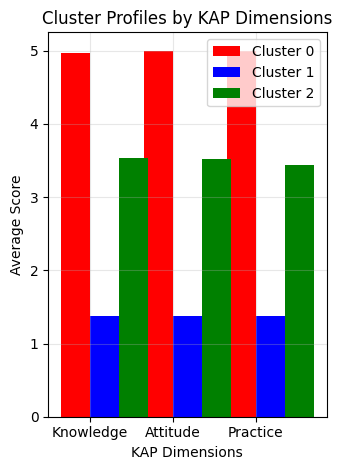

In [70]:
plt.subplot(1, 2, 2)
cluster_scores = []
for cluster_id in sorted(cluster_analysis.keys()):
    scores = [
        cluster_analysis[cluster_id]['knowledge_score'],
        cluster_analysis[cluster_id]['attitude_score'],
        cluster_analysis[cluster_id]['practice_score']
    ]
    cluster_scores.append(scores)
x = np.arange(len(['Knowledge', 'Attitude', 'Practice']))
width = 0.35
for i, (cluster_id, scores) in enumerate(zip(sorted(cluster_analysis.keys()), cluster_scores)):
    plt.bar(x + i*width, scores, width, label=f'Cluster {cluster_id}', color=colors[i])
plt.xlabel('KAP Dimensions')
plt.ylabel('Average Score')
plt.title('Cluster Profiles by KAP Dimensions')
plt.xticks(x + width/2, ['Knowledge', 'Attitude', 'Practice'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [80]:
def identify_high_value_customers(cluster_stats, threshold=2.0):
    high_value_clusters = []
    for cluster_id, stats in cluster_stats.items():
        if (stats['knowledge_score'] >= threshold and
            stats['attitude_score'] >= threshold and
            stats['practice_score'] >= threshold):
            high_value_clusters.append(cluster_id)
    return high_value_clusters
high_value_clusters = identify_high_value_customers(cluster_analysis)
print("High-Value Customer Analysis:")
for cluster_id in sorted(cluster_analysis.keys()):
    stats = cluster_analysis[cluster_id]
    is_high_value = cluster_id in high_value_clusters
    print(f"\nCluster {cluster_id}: {'HIGH-VALUE ' if is_high_value else 'Standard'}")
    print(f"  Overall KAP Score: {stats['overall_score']:.2f}")
    print(f"  Customer Readiness: {'Ready for EV adoption' if is_high_value else 'Needs nurturing'}")
    print(f"  Marketing Priority: {'Primary target' if is_high_value else 'Secondary target'}")


High-Value Customer Analysis:

Cluster 0: HIGH-VALUE 
  Overall KAP Score: 4.99
  Customer Readiness: Ready for EV adoption
  Marketing Priority: Primary target

Cluster 1: Standard
  Overall KAP Score: 1.38
  Customer Readiness: Needs nurturing
  Marketing Priority: Secondary target

Cluster 2: HIGH-VALUE 
  Overall KAP Score: 3.50
  Customer Readiness: Ready for EV adoption
  Marketing Priority: Primary target


In [85]:
print(f"Analyzed {len(data)} customers using {len(all_features)} KAP features")
print(f"Identified {best_k} distinct customer segments")
print(f"Best clustering achieved silhouette score: {k_results[best_k]['silhouette_score']:.3f}")

if high_value_clusters:
    high_value_count = sum(cluster_analysis[c]['size'] for c in high_value_clusters)
    print(f"{high_value_count}/{len(data)} customers identified as high-value targets")
    print(f"Primary target cluster(s): {high_value_clusters}")
else:
    print("No clusters meet high-value criteria - focus on nurturing existing segments")

print(f"PCA explains {sum(pca.explained_variance_ratio_):.1%} of variance in 2D visualization")

print("\nRECOMMENDED ACTION:")
if high_value_clusters:
    target_cluster = max(high_value_clusters, key=lambda x: cluster_analysis[x]['overall_score'])
    print(f"Prioritize Cluster {target_cluster} for immediate EV marketing campaigns")
    print(f"his cluster shows highest readiness across Knowledge, Attitude, and Practice")
else:
    best_cluster = max(cluster_analysis.keys(), key=lambda x: cluster_analysis[x]['overall_score'])
    print(f"Focus on nurturing Cluster {best_cluster} as the most promising segment")
    print(f"Develop targeted campaigns to improve their KAP scores")

Analyzed 1123 customers using 15 KAP features
Identified 3 distinct customer segments
Best clustering achieved silhouette score: 0.709
845/1123 customers identified as high-value targets
Primary target cluster(s): [np.int32(0), np.int32(2)]
PCA explains 99.6% of variance in 2D visualization

RECOMMENDED ACTION:
Prioritize Cluster 0 for immediate EV marketing campaigns
his cluster shows highest readiness across Knowledge, Attitude, and Practice
